In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
np.random.seed(42)

## CODIGO INICIAL

In [1]:
class AntColonyOptimization:
    def __init__(self, start, end, obstacles, grid_size=(10, 10), num_ants=10, evaporation_rate=0.1, alpha=0.1, beta=15):
        self.start = start
        self.end = end
        self.obstacles = obstacles
        self.grid_size = grid_size
        self.num_ants = num_ants
        self.evaporation_rate = evaporation_rate
        self.alpha = alpha
        self.beta = beta
        self.pheromones = np.ones(grid_size)
        self.best_path = None

    # Metodo para obtener los vecinos válidos de una posición dada
    def _get_neighbors(self, position):
        pos_x, pos_y = position
        neighbors = []
        for i in range(-1, 2):
            for j in range(-1, 2):
                new_x, new_y = pos_x + i, pos_y + j
                if (0 <= new_x < self.grid_size[0] and 0 <= new_y < self.grid_size[1] and
                        (new_x, new_y) != position and (new_x, new_y) not in self.obstacles):
                    neighbors.append((new_x, new_y))
        return neighbors

    # Metodo para seleccionar la siguiente posición (basada en las feromonas y la heurística)
    def _select_next_position(self, position, visited):
        neighbors = self._get_neighbors(position)
        probabilities = []
        total = 0
        for neighbor in neighbors:
            if neighbor not in visited:
                pheromone = self.pheromones[neighbor[1], neighbor[0]]
                heuristic = 1 / (np.linalg.norm(np.array(neighbor) - np.array(self.end)) + 0.1)
                probabilities.append((neighbor, pheromone ** self.alpha * heuristic ** self.beta))
                total += pheromone ** self.alpha * heuristic ** self.beta
        if not probabilities:
            return None
        probabilities = [(pos, prob / total) for pos, prob in probabilities]
        selected = np.random.choice(len(probabilities), p=[prob for pos, prob in probabilities])
        return probabilities[selected][0]

    # Metodo para evaporar las feromonas en la cuadrícula
    def _evaporate_pheromones(self):
        self.pheromones *= (1 - self.evaporation_rate)

    # Metodo para depositar feromonas a lo largo de un camino
    def _deposit_pheromones(self, path):
        for position in path:
            self.pheromones[position[1], position[0]] += 1

    # Metodo que encuentra el mejor camino (luego de un número específico de iteraciones
    def find_best_path(self, num_iterations):
        for _ in range(num_iterations):
            all_paths = []
            for _ in range(self.num_ants):
                current_position = self.start
                path = [current_position]
                while current_position != self.end:
                    next_position = self._select_next_position(current_position, path)
                    if next_position is None:
                        break
                    path.append(next_position)
                    current_position = next_position
                all_paths.append(path)

            # Escoger el mejor camino por su tamaño?
            # --------------------------
            all_paths.sort(key=lambda x: len(x))
            best_path = all_paths[0]

            self._evaporate_pheromones()
            self._deposit_pheromones(best_path)

            if self.best_path is None or len(best_path) <= len(self.best_path):
                self.best_path = best_path
            # --------------------------

    # Metodo para graficar la cuadrícula con el mejor camino encontrado (se visualiza también el punto inicial, punto de llegada, las feromonas y los obstáculos) 
    def plot(self):
        cmap = LinearSegmentedColormap.from_list('pheromone', ['white', 'green', 'red'])
        plt.figure(figsize=(8, 8))
        plt.imshow(self.pheromones, cmap=cmap, vmin=np.min(self.pheromones), vmax=np.max(self.pheromones))
        plt.colorbar(label='Pheromone intensity')
        plt.scatter(self.start[0], self.start[1], color='orange', label='Start', s=100)
        plt.scatter(self.end[0], self.end[1], color='magenta', label='End', s=100)
        for obstacle in self.obstacles:
            plt.scatter(obstacle[0], obstacle[1], color='gray', s=900, marker='s')
        if self.best_path:
            path_x, path_y = zip(*self.best_path)
            plt.plot(path_x, path_y, color='blue', label='Best Path', linewidth=3)
        plt.xlabel('Column')
        plt.ylabel('Row')
        plt.title('Ant Colony Optimization')
        plt.legend()
        plt.grid(True)
        plt.show()

## A. Correr la implementación planteada
### Caso de estudio 1

In [3]:
def study_case_1():
    print("Start of Ant Colony Optimization - First Study Case")
    start = (0, 0)
    end = (4, 7)
    obstacles = [(1, 2), (2, 2), (3, 2)]
    aco = AntColonyOptimization(start, end, obstacles)
    aco.find_best_path(100)
    aco.plot()
    print("End of Ant Colony Optimization")
    print("Best path: ", aco.best_path)

Start of Ant Colony Optimization - First Study Case


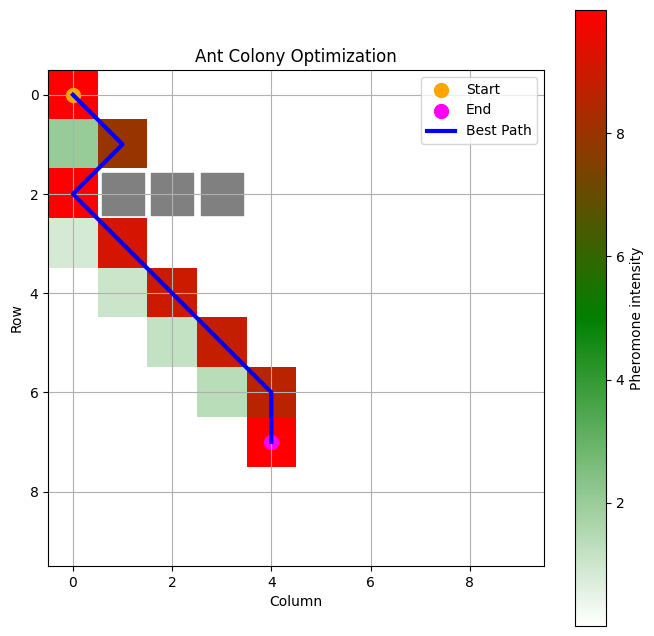

End of Ant Colony Optimization
Best path:  [(0, 0), (1, 1), (0, 2), (1, 3), (2, 4), (3, 5), (4, 6), (4, 7)]


In [4]:
if __name__ == '__main__':
    study_case_1()

## B. ¿Qué ocurre con el segundo caso de estudio?
### Caso de estudio 2

In [5]:
def study_case_2():
    print("Start of Ant Colony Optimization - Second Study Case")
    start = (0, 0)
    end = (4, 7)
    obstacles = [(0, 2), (1, 2), (2, 2), (3, 2)]
    aco = AntColonyOptimization(start, end, obstacles)
    aco.find_best_path(100)
    aco.plot()
    print("End of Ant Colony Optimization")
    print("Best path: ", aco.best_path)

Start of Ant Colony Optimization - Second Study Case


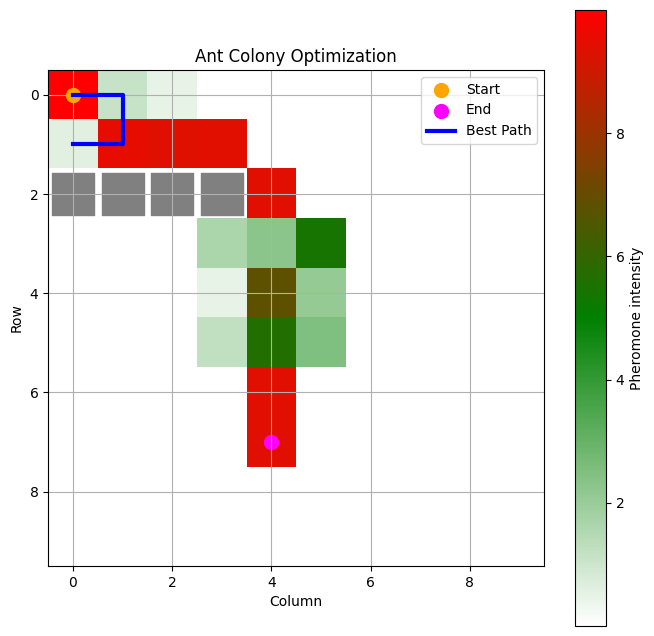

End of Ant Colony Optimization
Best path:  [(0, 0), (1, 0), (1, 1), (0, 1)]


In [6]:
if __name__ == '__main__':
    study_case_2()

## CODIGO PROPUESTO CON CORRECCIONES 

In [24]:
class AntColonyOptimization:
    def __init__(self, start, end, obstacles, num_ants: int, evaporation_rate: float, alpha: float, beta: float, grid_size =(10, 10)):
        self.start = start
        self.end = end
        self.obstacles = obstacles
        self.grid_size = grid_size
        self.num_ants = num_ants
        self.evaporation_rate = evaporation_rate
        self.alpha = alpha
        self.beta = beta
        self.pheromones = np.ones(grid_size)
        self.best_path = None

    # Metodo para obtener los vecinos válidos de una posición dada
    def _get_neighbors(self, position):
        pos_x, pos_y = position
        neighbors = []
        for i in range(-1, 2):
            for j in range(-1, 2):
                new_x, new_y = pos_x + i, pos_y + j
                if (0 <= new_x < self.grid_size[0] and 0 <= new_y < self.grid_size[1] and
                        (new_x, new_y) != position and (new_x, new_y) not in self.obstacles):
                    neighbors.append((new_x, new_y))
        return neighbors

    # Metodo para seleccionar la siguiente posición (basada en las feromonas y la heurística)
    def _select_next_position(self, position, visited):
        neighbors = self._get_neighbors(position)
        probabilities = []
        total = 0
        for neighbor in neighbors:
            if neighbor not in visited:
                pheromone = self.pheromones[neighbor[1], neighbor[0]]
                heuristic = 1 / (np.linalg.norm(np.array(neighbor) - np.array(self.end)) + 0.1)
                probabilities.append((neighbor, pheromone ** self.alpha * heuristic ** self.beta))
                total += pheromone ** self.alpha * heuristic ** self.beta
        
        # Verificar si total es 0 para evitar la división por 0
        if total == 0:
            return None
        # if not probabilities:
        #     return None
        probabilities = [(pos, prob / total) for pos, prob in probabilities]
        selected = np.random.choice(len(probabilities), p=[prob for pos, prob in probabilities])
        return probabilities[selected][0]

    # Metodo para evaporar las feromonas en la cuadrícula
    def _evaporate_pheromones(self):
        self.pheromones *= (1 - self.evaporation_rate)

    # Metodo para depositar feromonas a lo largo de un camino
    def _deposit_pheromones(self, path):
        for position in path:
            self.pheromones[position[1], position[0]] += 1

    # Metodo que encuentra el mejor camino (luego de un número específico de iteraciones
    def find_best_path(self, num_iterations):
        for _ in range(num_iterations):
            all_paths = []

            for _ in range(self.num_ants):
                current_position = self.start
                path = [current_position]
                while current_position != self.end:
                    next_position = self._select_next_position(current_position, path)
                    if next_position is None:
                        break
                    path.append(next_position)
                    current_position = next_position
                all_paths.append(path)

            # Escoger el mejor camino por su tamaño?
            # CORRECCIÓN: Seleccionar camino basándose en longitud y FEROMONAS 
            all_paths.sort(key = lambda x: (len(x), sum(self.pheromones[pos[1], pos[0]] for pos in x)))
            best_path = all_paths[0]
            # --------------------------

            self._evaporate_pheromones()
            self._deposit_pheromones(best_path)

            if self.best_path is None or len(best_path) <= len(self.best_path):
                self.best_path = best_path
            # --------------------------

    # Metodo para graficar la cuadrícula con el mejor camino encontrado (se visualiza también el punto inicial, punto de llegada, las feromonas y los obstáculos) 
    def plot(self):
        cmap = LinearSegmentedColormap.from_list('pheromone', ['white', 'green', 'red'])
        plt.figure(figsize=(8, 8))
        plt.imshow(self.pheromones, cmap=cmap, vmin=np.min(self.pheromones), vmax=np.max(self.pheromones))
        plt.colorbar(label='Pheromone intensity')
        plt.scatter(self.start[0], self.start[1], color='orange', label='Start', s=100)
        plt.scatter(self.end[0], self.end[1], color='magenta', label='End', s=100)
        for obstacle in self.obstacles:
            plt.scatter(obstacle[0], obstacle[1], color='gray', s=900, marker='s')
        if self.best_path:
            path_x, path_y = zip(*self.best_path)
            plt.plot(path_x, path_y, color='blue', label='Best Path', linewidth=3)
        plt.xlabel('Column')
        plt.ylabel('Row')
        plt.title('Ant Colony Optimization')
        plt.legend()
        plt.grid(True)
        plt.show()

### Caso de estudio 1

In [7]:
def study_case_1():
    print("Start of Ant Colony Optimization - First Study Case")
    start = (0, 0)
    end = (4, 7)
    obstacles = [(1, 2), (2, 2), (3, 2)]
    aco = AntColonyOptimization(start, end, obstacles, num_ants = 10, evaporation_rate = 0.1, alpha = 0.1, beta = 15)
    aco.find_best_path(100)
    aco.plot()
    print("End of Ant Colony Optimization")
    print("Best path: ", aco.best_path)

Start of Ant Colony Optimization - First Study Case


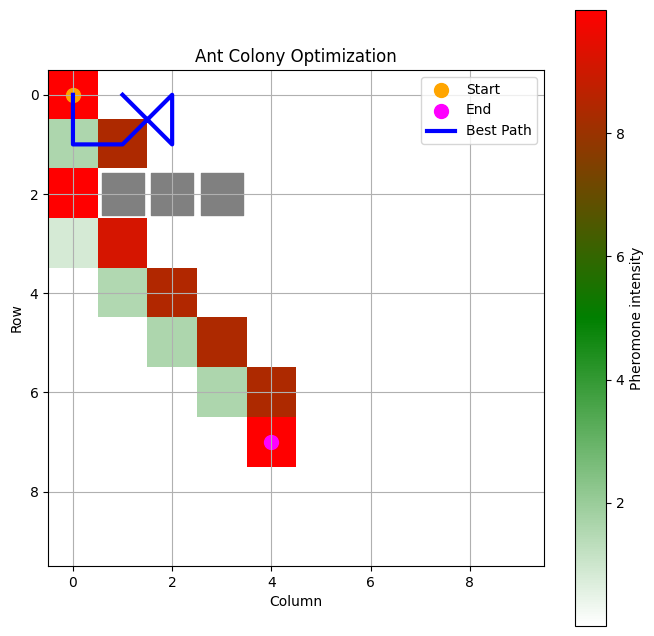

End of Ant Colony Optimization
Best path:  [(0, 0), (0, 1), (1, 1), (2, 0), (2, 1), (1, 0)]


In [8]:
if __name__ == '__main__':
    study_case_1()

### Caso de estudio 2

In [9]:
def study_case_2():
    print("Start of Ant Colony Optimization - First Study Case")
    start = (0, 0)
    end = (4, 7)
    obstacles = [(0, 2), (1, 2), (2, 2), (3, 2)]
    aco = AntColonyOptimization(start, end, obstacles, num_ants = 10, evaporation_rate = 0.1, alpha = 0.1, beta = 15)
    aco.find_best_path(100)
    aco.plot()
    print("End of Ant Colony Optimization")
    print("Best path: ", aco.best_path)

Start of Ant Colony Optimization - First Study Case


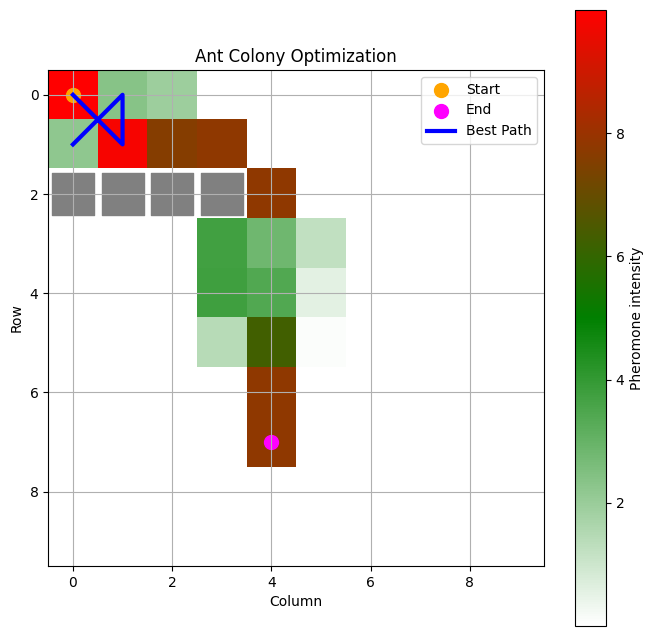

End of Ant Colony Optimization
Best path:  [(0, 0), (1, 1), (1, 0), (0, 1)]


In [10]:
if __name__ == '__main__':
    study_case_2()

## FUNCION PARA PROBAR CON DISTINTOS PARAMETROS EL CASO DE ESTUDIO 2

In [34]:
def probar_parametros():
    # Definición de rangos de parámetros a probar
    alphas = [0.01, 0.1, 0.5, 1.0, 2.0]
    betas = [0.5, 1, 5, 10, 15, 20]
    evaporation_rates = [0.005, 0.1, 0.3, 0.5, 1.0]
    num_ants = 25
    
    # Caso de estudio 2
    start = (0, 0)
    end = (4, 7)
    obstacles = [(0, 2), (1, 2), (2, 2), (3, 2)]
    
    # Iteración sobre los diferentes valores de los parámetros
    for alpha in alphas:
        for beta in betas:
            for evaporation_rate in evaporation_rates:
                # print(f"Probando con ALPHA = {alpha}, BETA = {beta}, EVAPORATION RATE = {evaporation_rate}")
                
                # Crear la instancia de ACO con los valores actuales de los parámetros
                aco = AntColonyOptimization(start, end, obstacles, num_ants = num_ants, alpha = alpha, beta = beta, evaporation_rate = evaporation_rate)
                
                # Ejecución del algoritmo
                aco.find_best_path(100)
                
                # Se muestran los resultados obtenidos solo para los caminos que llegaron al punto final
                if end in aco.best_path:
                    print(f"Probando con ALPHA = {alpha}, BETA = {beta}, EVAPORATION RATE = {evaporation_rate}")
                    print("Mejor camino encontrado:", aco.best_path)
                    aco.plot()

Probando con ALPHA = 0.01, BETA = 15, EVAPORATION RATE = 1.0
Mejor camino encontrado: [(0, 0), (1, 1), (2, 1), (3, 1), (4, 2), (5, 3), (5, 4), (5, 5), (4, 6), (4, 7)]


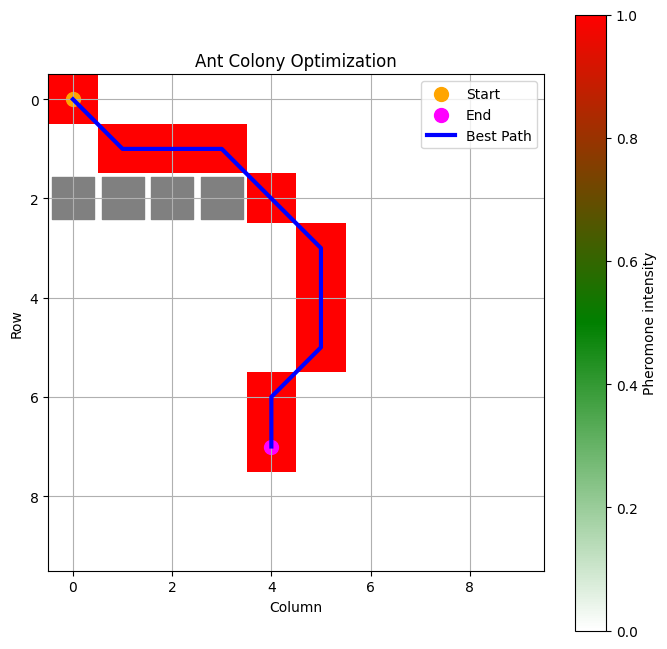

Probando con ALPHA = 0.1, BETA = 10, EVAPORATION RATE = 1.0
Mejor camino encontrado: [(0, 0), (1, 1), (2, 1), (3, 1), (4, 2), (4, 3), (4, 4), (3, 5), (4, 6), (4, 7)]


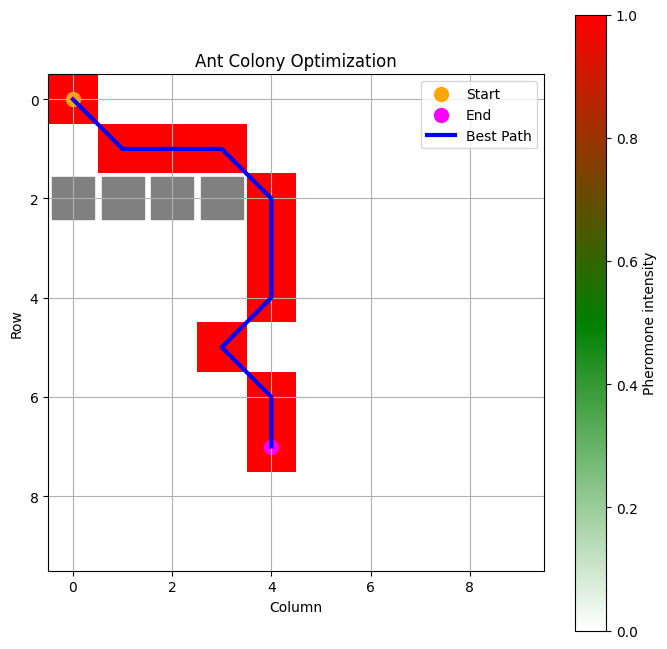

Probando con ALPHA = 0.1, BETA = 20, EVAPORATION RATE = 1.0
Mejor camino encontrado: [(0, 0), (1, 1), (2, 1), (3, 1), (4, 2), (3, 3), (4, 4), (4, 5), (4, 6), (4, 7)]


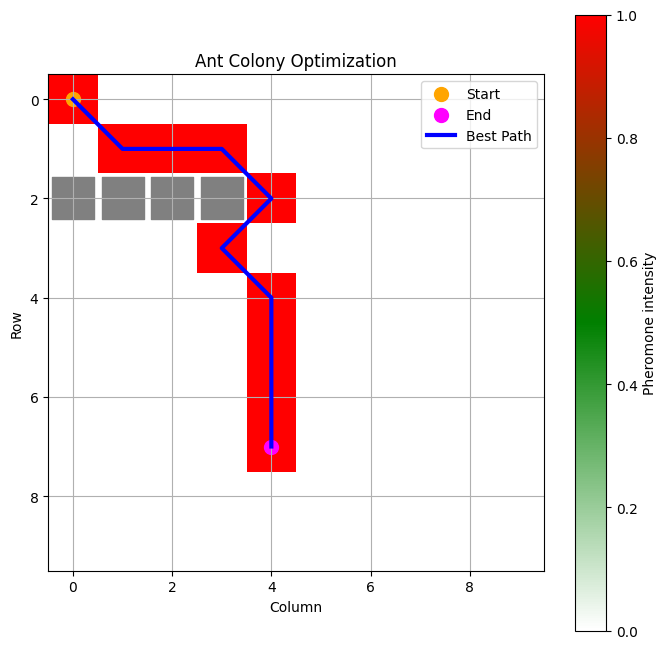

Probando con ALPHA = 0.5, BETA = 15, EVAPORATION RATE = 1.0
Mejor camino encontrado: [(0, 0), (1, 1), (2, 1), (3, 1), (4, 2), (4, 3), (4, 4), (3, 5), (4, 6), (4, 7)]


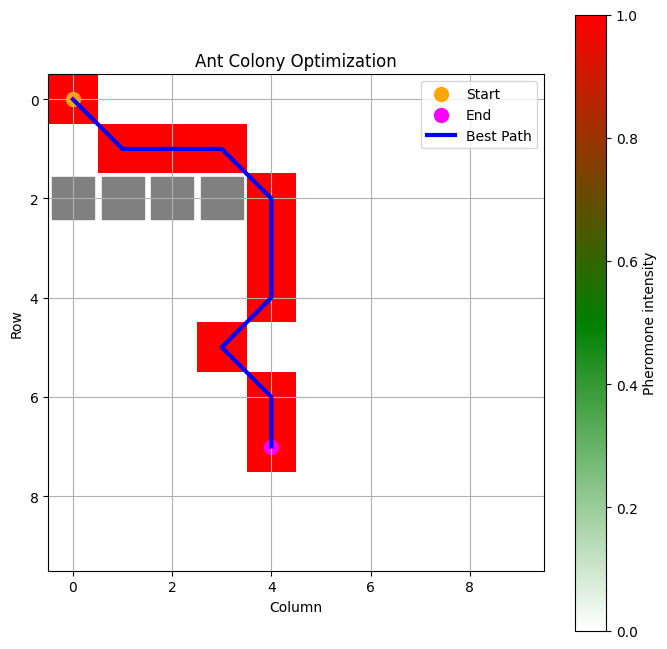

Probando con ALPHA = 0.5, BETA = 20, EVAPORATION RATE = 0.3
Mejor camino encontrado: [(0, 0), (1, 1), (2, 1), (3, 1), (4, 2), (5, 3), (4, 4), (4, 5), (4, 6), (4, 7)]


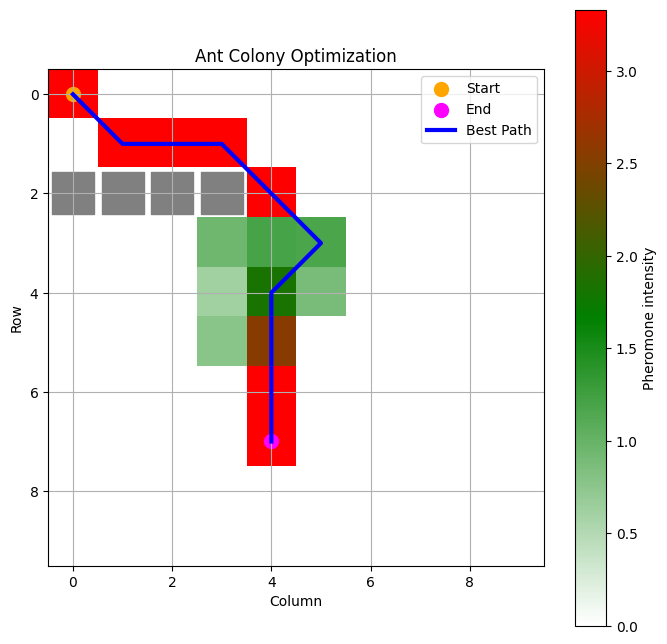

Probando con ALPHA = 0.5, BETA = 20, EVAPORATION RATE = 1.0
Mejor camino encontrado: [(0, 0), (1, 1), (2, 1), (3, 1), (4, 2), (3, 3), (4, 4), (3, 5), (4, 6), (4, 7)]


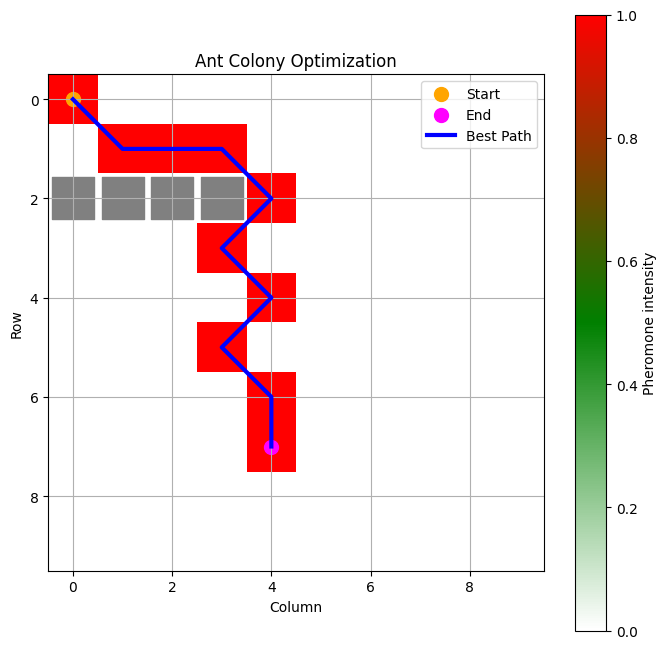

Probando con ALPHA = 1.0, BETA = 15, EVAPORATION RATE = 0.5
Mejor camino encontrado: [(0, 0), (1, 1), (2, 1), (3, 1), (4, 2), (3, 3), (4, 4), (4, 5), (4, 6), (4, 7)]


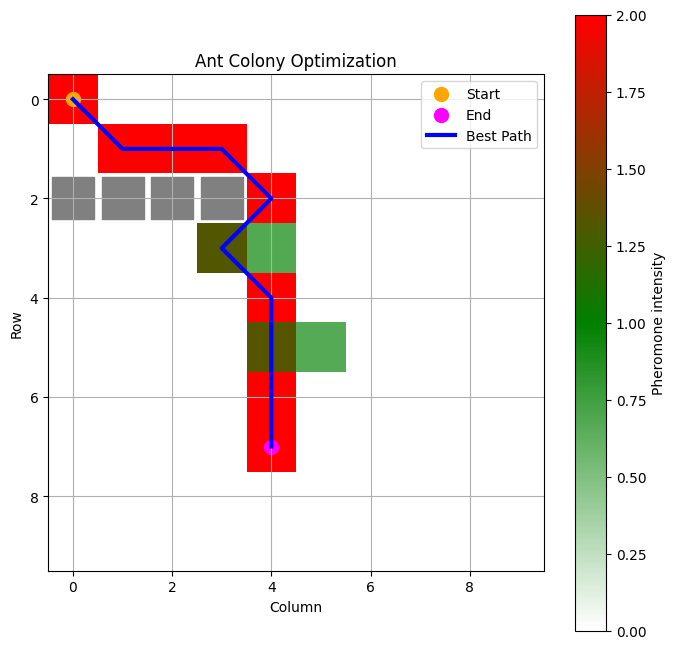

Probando con ALPHA = 1.0, BETA = 20, EVAPORATION RATE = 0.005
Mejor camino encontrado: [(0, 0), (1, 1), (2, 1), (3, 1), (4, 2), (5, 3), (5, 4), (4, 5), (4, 6), (4, 7)]


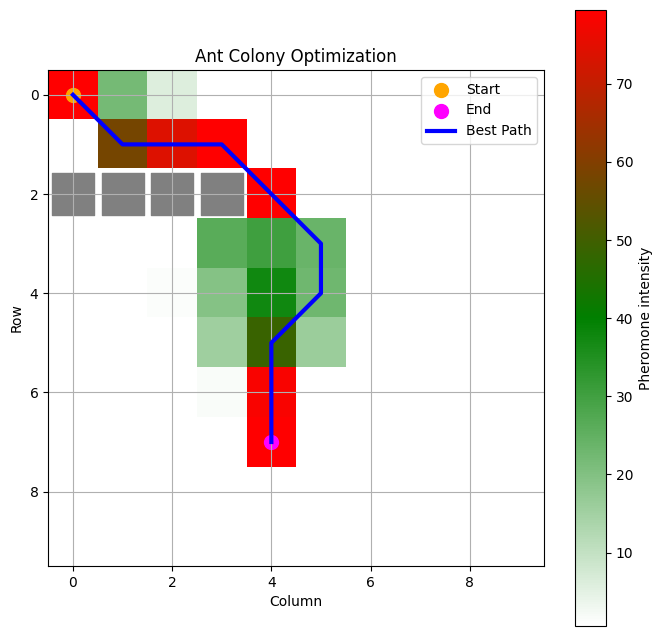

Probando con ALPHA = 1.0, BETA = 20, EVAPORATION RATE = 0.3
Mejor camino encontrado: [(0, 0), (1, 1), (2, 1), (3, 1), (4, 2), (3, 3), (4, 4), (4, 5), (4, 6), (4, 7)]


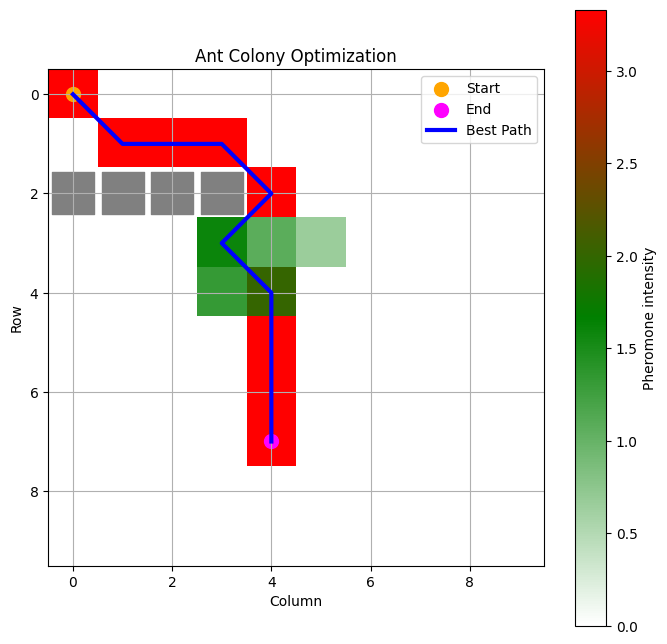

Probando con ALPHA = 1.0, BETA = 20, EVAPORATION RATE = 0.5
Mejor camino encontrado: [(0, 0), (1, 1), (2, 1), (3, 1), (4, 2), (4, 3), (3, 4), (4, 5), (4, 6), (4, 7)]


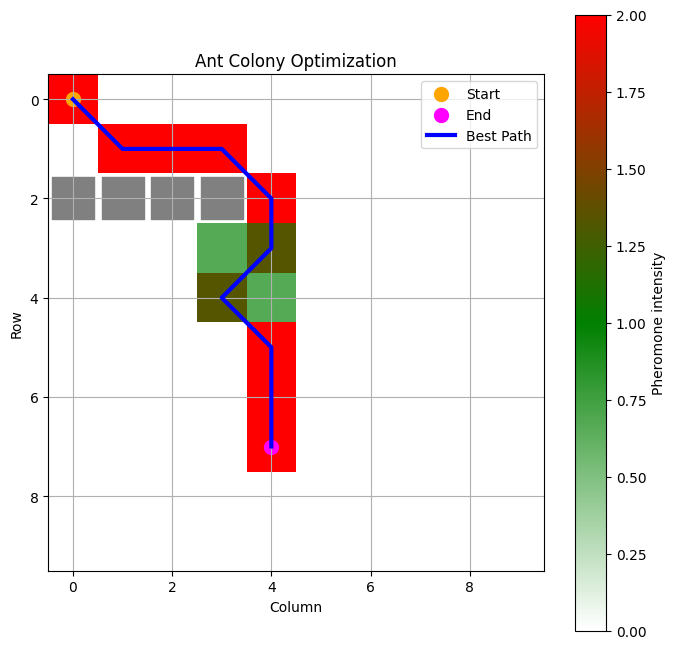

Probando con ALPHA = 1.0, BETA = 20, EVAPORATION RATE = 1.0
Mejor camino encontrado: [(0, 0), (1, 1), (2, 1), (3, 1), (4, 2), (5, 3), (4, 4), (5, 5), (4, 6), (4, 7)]


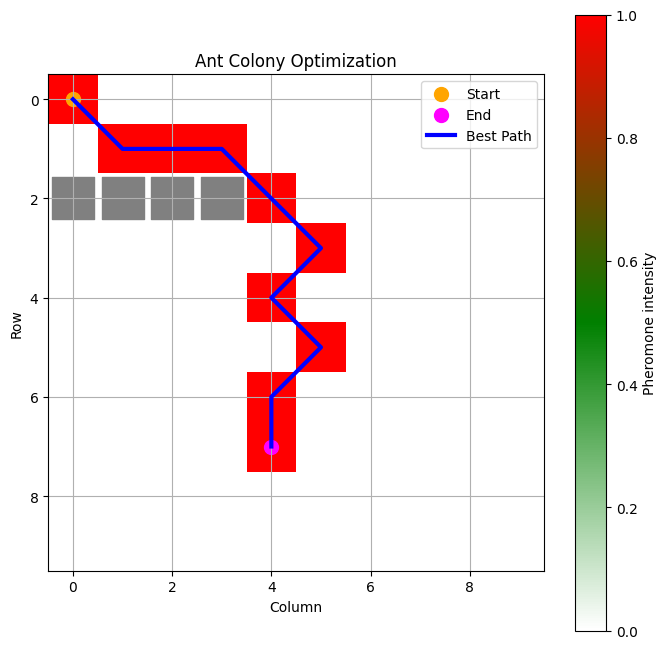

Probando con ALPHA = 2.0, BETA = 10, EVAPORATION RATE = 0.1
Mejor camino encontrado: [(0, 0), (1, 1), (2, 1), (3, 1), (4, 2), (4, 3), (5, 4), (4, 5), (4, 6), (4, 7)]


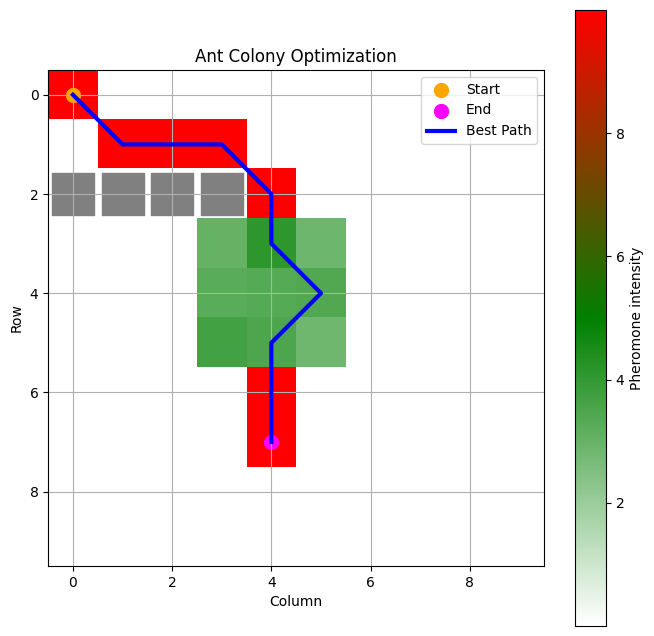

Probando con ALPHA = 2.0, BETA = 15, EVAPORATION RATE = 0.1
Mejor camino encontrado: [(0, 0), (1, 1), (2, 1), (3, 1), (4, 2), (4, 3), (3, 4), (4, 5), (4, 6), (4, 7)]


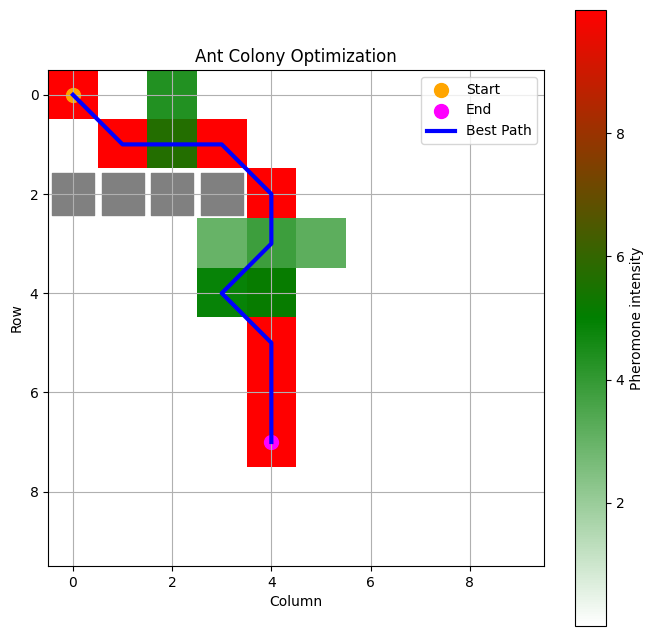

Probando con ALPHA = 2.0, BETA = 15, EVAPORATION RATE = 1.0
Mejor camino encontrado: [(0, 0), (1, 0), (2, 0), (3, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7)]


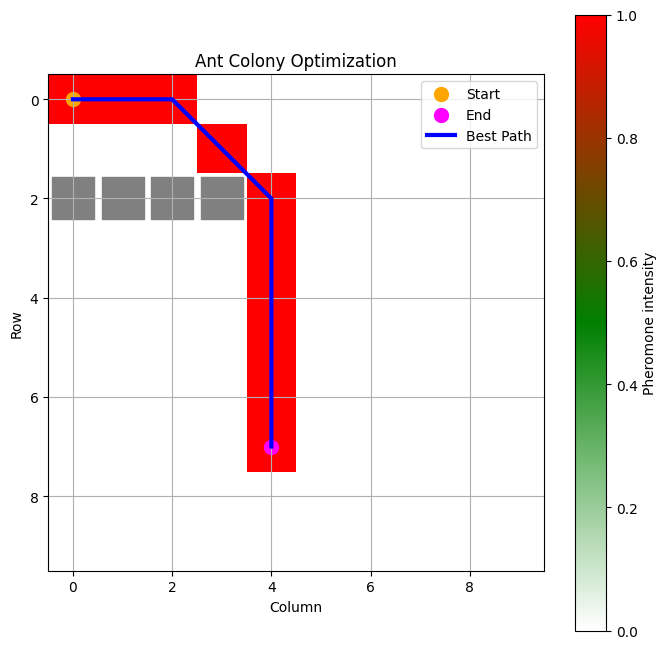

Probando con ALPHA = 2.0, BETA = 20, EVAPORATION RATE = 0.1
Mejor camino encontrado: [(0, 0), (1, 1), (2, 1), (3, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7)]


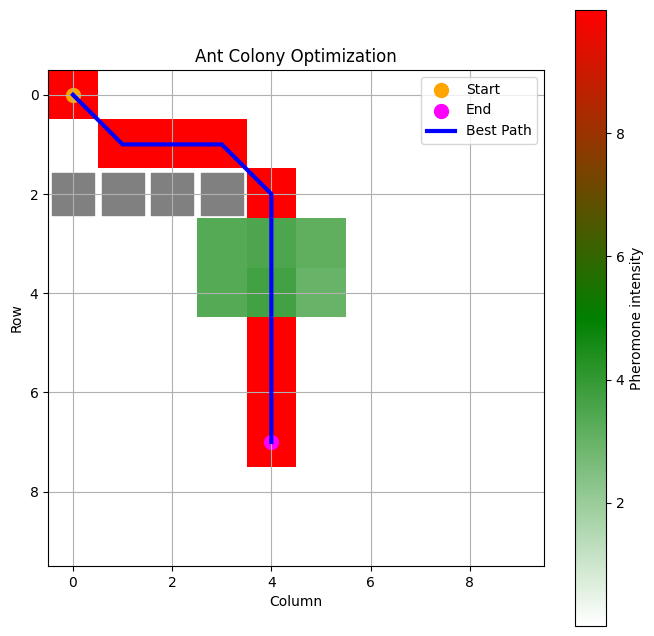

Probando con ALPHA = 2.0, BETA = 20, EVAPORATION RATE = 0.5
Mejor camino encontrado: [(0, 0), (1, 1), (2, 1), (3, 1), (4, 2), (3, 3), (4, 4), (4, 5), (4, 6), (4, 7)]


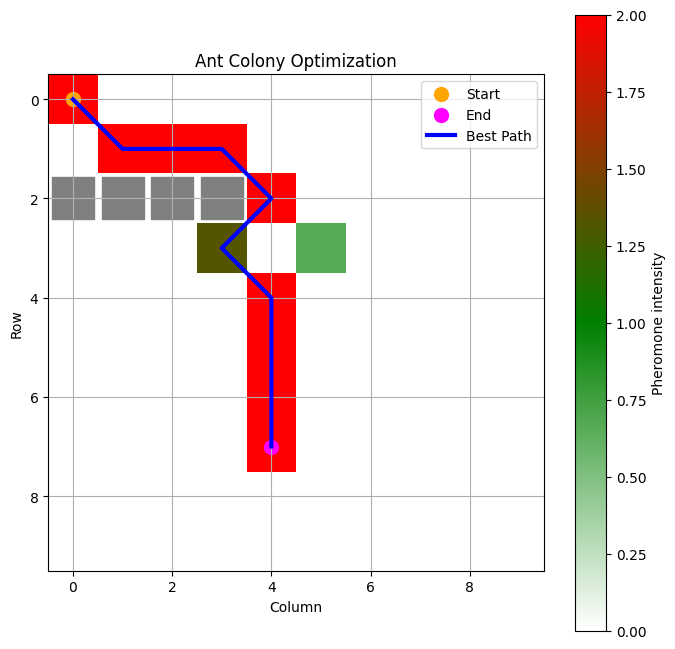

Probando con ALPHA = 2.0, BETA = 20, EVAPORATION RATE = 1.0
Mejor camino encontrado: [(0, 0), (1, 1), (2, 1), (3, 1), (4, 2), (3, 3), (4, 4), (4, 5), (4, 6), (4, 7)]


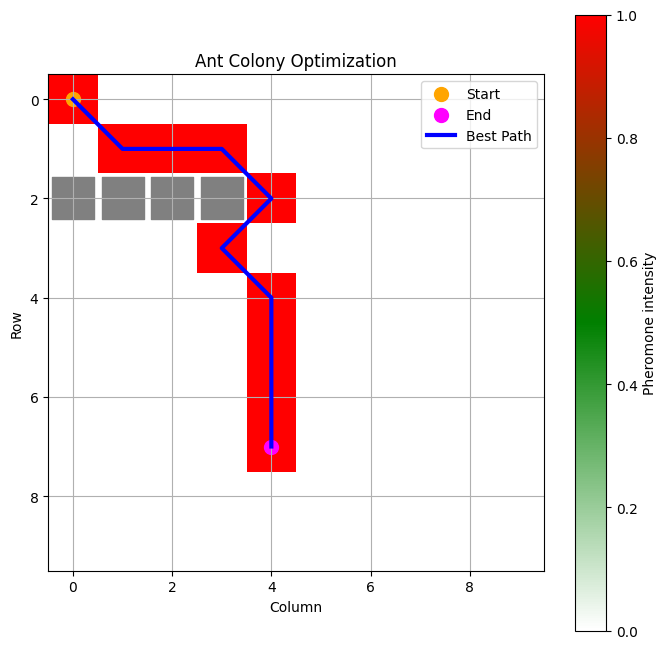

In [35]:
if __name__ == '__main__':
    probar_parametros()